<a href="https://colab.research.google.com/github/firdarinoa/bangkit-assignment5/blob/develop/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.python.data import Dataset
from sklearn import metrics
from matplotlib import cm

In [2]:
cases = pd.read_csv('/content/cases.csv')
cases.head()

,date,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate
0,2-Mar-20,339.0,2.0,2.0,335.0,2.0,2.0,0.0,0.0,0.0,0.0,0.59%,98.82%,0.00%,0.00%
1,3-Mar-20,341.0,0.0,2.0,337.0,2.0,2.0,0.0,0.0,0.0,0.0,0.59%,98.83%,0.00%,0.00%
2,4-Mar-20,372.0,0.0,2.0,356.0,14.0,2.0,0.0,0.0,0.0,0.0,0.54%,95.70%,0.00%,0.00%
3,5-Mar-20,388.0,0.0,2.0,371.0,15.0,2.0,0.0,0.0,0.0,0.0,0.52%,95.62%,0.00%,0.00%
4,6-Mar-20,450.0,2.0,4.0,422.0,24.0,4.0,0.0,0.0,0.0,0.0,0.89%,93.78%,0.00%,0.00%


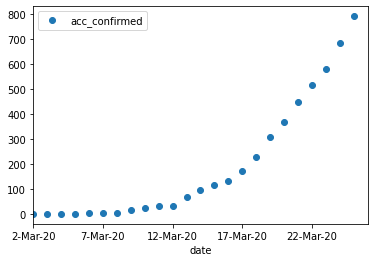

In [11]:
cases.plot(x='date', y='acc_confirmed', style='o') 

In [3]:
confirmed_acc = pd.read_csv('/content/confirmed_acc.csv')
confirmed_acc.head()

,date,cases
0,1/22/2020,0
1,1/23/2020,0
2,1/24/2020,0
3,1/25/2020,0
4,1/26/2020,0


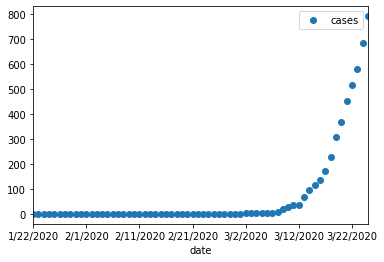

In [12]:
confirmed_acc.plot(x='date', y='cases', style='o') 

In [5]:
keywordtrend = pd.read_csv('/content/keywordtrend.csv')
keywordtrend.head()

,Day,Coronavirus,corona,virus corona,covid,Pneumonia
0,2/1/2020,15,20,8,0,0
1,2/2/2020,22,18,16,0,2
2,2/3/2020,26,23,13,0,2
3,2/4/2020,14,17,7,0,0
4,2/5/2020,15,15,11,0,4


In [6]:
patient = pd.read_csv('/content/patient.csv')
patient.head()

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan


In [14]:
patient.groupby(['contacted_with', 'province'])['patient_id'].count()

contacted_with  province   
1.0             DKI Jakarta    14
8.0             DKI Jakarta     1
20.0            DKI Jakarta     1
22.0            DKI Jakarta     1
71.0            DKI Jakarta     1
74.0            DKI Jakarta     3
                Jawa Barat      2
78.0            DKI Jakarta     2
81.0            DKI Jakarta     1
83.0            DKI Jakarta     1
Name: patient_id, dtype: int64

Text(0.5, 1.0, 'Trend of cases by State')

<Figure size 1440x720 with 0 Axes>

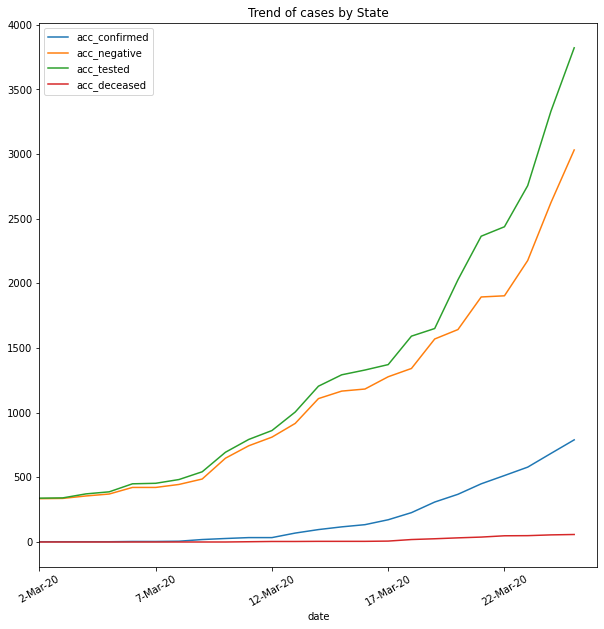

In [15]:
plt.figure(figsize=(20,10))
cases.plot('date',['acc_confirmed', 'acc_negative', 'acc_tested', 'acc_deceased'],figsize=(10,10), rot=30)
plt.title("Trend of cases by State")

In [16]:
import plotly.express as px
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from fbprophet import Prophet

In [17]:
data_confirmed_cases = cases[['date', 'acc_confirmed']]
data_confirmed_cases.dropna(inplace=True)
data_confirmed_cases['date'] = pd.to_datetime(data_confirmed_cases['date'])
data_confirmed_cases.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,acc_confirmed
19,2020-03-21,450.0
20,2020-03-22,514.0
21,2020-03-23,579.0
22,2020-03-24,685.0
23,2020-03-25,790.0


In [0]:
date_deceased = pd.date_range('2020-01-21', '2020-03-01')
confirmed = {'date': date_deceased, 'acc_confirmed': 0}
fbp_confirmed = pd.DataFrame(data=confirmed)

In [0]:
data_confirmed_cases = data_confirmed_cases.append(fbp_confirmed)
data_confirmed_cases = data_confirmed_cases.sort_values(by='date').reset_index()
data_confirmed_cases.drop('index', axis=1, inplace=True)

In [20]:
data_confirmed_cases = data_confirmed_cases.rename(columns={"date": "ds", "acc_confirmed": "y"})
data_confirmed_cases['ds'] = pd.to_datetime(data_confirmed_cases['ds'])
data_confirmed_cases.head()

,ds,y
0,2020-01-21,0.0
1,2020-01-22,0.0
2,2020-01-23,0.0
3,2020-01-24,0.0
4,2020-01-25,0.0


In [21]:
m = Prophet(
    changepoint_prior_scale=0.2,
    changepoint_range=0.95,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

# for more information about changepoint take a look to this link: https://facebook.github.io/prophet/docs/trend_changepoints.html

m.fit(data_confirmed_cases)

future = m.make_future_dataframe(periods=15)
forecast_confirmed = m.predict(future)


forecast_confirmed[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,ds,yhat,yhat_lower,yhat_upper
65,2020-03-26,854.435977,847.154012,861.752664
66,2020-03-27,937.972930,928.812303,947.240366
67,2020-03-28,1021.509883,1009.848553,1033.075904
68,2020-03-29,1105.046835,1089.835739,1120.863139
69,2020-03-30,1188.583788,1167.016094,1210.367108
70,2020-03-31,1272.120741,1243.783182,1300.078097
71,2020-04-01,1355.657694,1320.693043,1390.121436
72,2020-04-02,1439.194647,1397.357735,1483.752455
73,2020-04-03,1522.731599,1468.028195,1574.058783
74,2020-04-04,1606.268552,1542.892250,1667.531211


In [22]:
from fbprophet.plot import plot_plotly
fig = plot_plotly(m, forecast_confirmed)
py.iplot(fig) 

In [23]:
data_deceased_cases = cases[['date', 'acc_deceased']]
data_deceased_cases.dropna(inplace=True)
data_deceased_cases['date'] = pd.to_datetime(data_deceased_cases['date'])
data_deceased_cases.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,acc_deceased
19,2020-03-21,38.0
20,2020-03-22,48.0
21,2020-03-23,49.0
22,2020-03-24,55.0
23,2020-03-25,58.0


In [0]:
date_deceased = pd.date_range('2020-01-21', '2020-03-01')
deceased = {'date': date_deceased, 'acc_deceased': 0}
fbp_deceased = pd.DataFrame(data=deceased)

In [0]:
data_deceased_cases = data_deceased_cases.append(fbp_deceased)
data_deceased_cases = data_deceased_cases.sort_values(by='date').reset_index()
data_deceased_cases.drop('index', axis=1, inplace=True)

In [26]:
data_deceased_cases = data_deceased_cases.rename(columns={"date": "ds", "acc_deceased": "y"})
data_deceased_cases['ds'] = pd.to_datetime(data_deceased_cases['ds'])
data_deceased_cases.head()

,ds,y
0,2020-01-21,0.0
1,2020-01-22,0.0
2,2020-01-23,0.0
3,2020-01-24,0.0
4,2020-01-25,0.0


In [27]:
m = Prophet(
    changepoint_prior_scale=0.2,
    changepoint_range=0.95,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

# for more information about changepoint take a look to this link: https://facebook.github.io/prophet/docs/trend_changepoints.html

m.fit(data_deceased_cases)

future = m.make_future_dataframe(periods=15)
forecast_deceased = m.predict(future)


forecast_deceased[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
65,2020-03-26,65.974479,64.753565,67.244854
66,2020-03-27,71.575723,70.241014,72.815831
67,2020-03-28,77.176968,75.683510,78.579803
68,2020-03-29,82.778212,80.931536,84.303430
69,2020-03-30,88.379456,86.032561,90.388437
70,2020-03-31,93.980701,91.171951,96.401086
71,2020-04-01,99.581945,95.936408,102.551794
72,2020-04-02,105.183189,100.914901,108.874100
73,2020-04-03,110.784434,105.769242,115.119184
74,2020-04-04,116.385678,110.692228,121.539982


In [30]:
fig = plot_plotly(m, forecast_deceased)
py.iplot(fig) 

Text(0.5, 1.0, 'Example of Stagnant Confirmed trend')

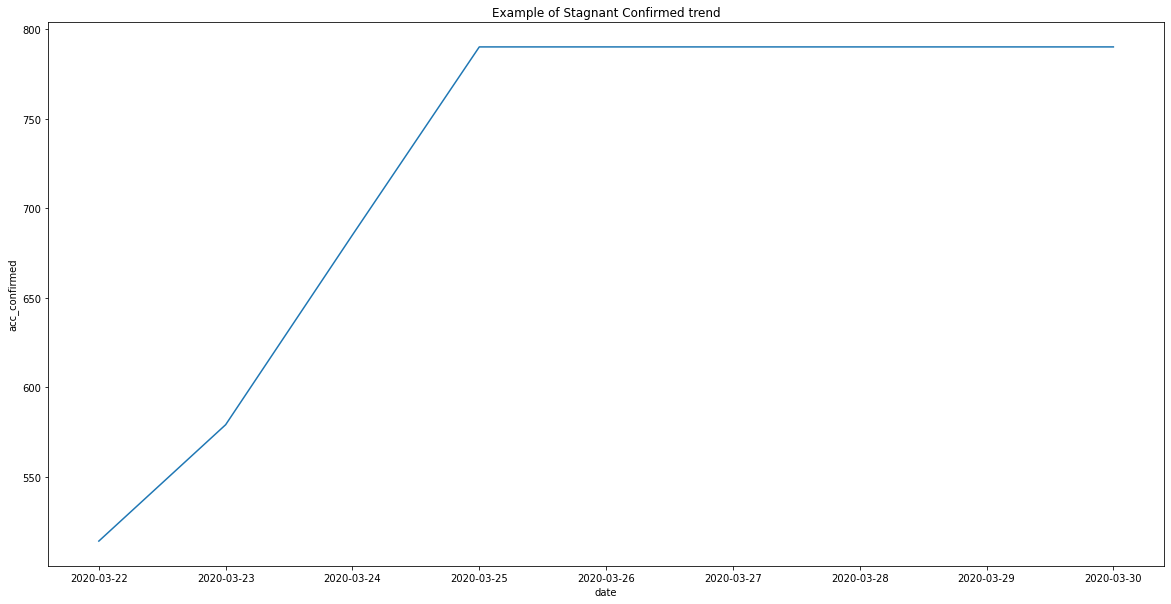

In [29]:
ex_stagnant_confirmed_cases = pd.date_range('2020-03-26', '2020-03-30')
stagnant_confirmed = {'date': ex_stagnant_confirmed_cases, 'acc_confirmed': 790}
fbp_stagnant_confirmed = pd.DataFrame(data=stagnant_confirmed)
data_confirmed_cases_staganant = cases.loc[20:23, ["date", "acc_confirmed"]] #only get from 22 mar 20 to 25 mar 20
data_confirmed_cases_staganant = data_confirmed_cases_staganant.append(fbp_stagnant_confirmed)
data_confirmed_cases_staganant['date'] = pd.to_datetime(data_confirmed_cases_staganant['date'])
data_confirmed_cases_staganant = data_confirmed_cases_staganant.sort_values(by='date').reset_index()
data_confirmed_cases_staganant.drop('index', axis=1, inplace=True)

plt.figure(figsize=(20,10))
sns.lineplot(x="date", y='acc_confirmed', data=data_confirmed_cases_staganant)
plt.title("Example of Stagnant Confirmed trend")